# Análisis Estadístico

Instalar paquetes

In [94]:
try:
  import yfinance
except ImportError:
    !pip install yfinance

In [95]:
try:
  import arch
except ImportError:
    !pip install  arch

# Cargar Librerias

In [96]:
#Lectura de Datos, desde Finance Yahoo
import yfinance as yf

In [97]:
#Librerías para la modelación
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import  adfuller

In [98]:
#Librerías de Visualización (Gráficos)
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Leer Datos

In [99]:
#Cargar los datos
company = '^MXX'
ticker = yf.Ticker(company)
hist = ticker.history(start = '1991-11-17', end='2024-6-21')

hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1991-11-18 00:00:00-06:00,1415.900024,1415.900024,1415.900024,1415.900024,0,0.0,0.0
1991-11-19 00:00:00-06:00,1365.099976,1365.099976,1365.099976,1365.099976,0,0.0,0.0
1991-11-21 00:00:00-06:00,1387.900024,1387.900024,1387.900024,1387.900024,0,0.0,0.0
1991-11-22 00:00:00-06:00,1376.199951,1376.199951,1376.199951,1376.199951,0,0.0,0.0
1991-11-26 00:00:00-06:00,1365.199951,1365.199951,1365.199951,1365.199951,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-06-14 00:00:00-06:00,52218.929688,52482.808594,51872.128906,52222.941406,268209500,0.0,0.0
2024-06-17 00:00:00-06:00,52247.328125,52438.781250,52000.769531,52397.199219,170039700,0.0,0.0
2024-06-18 00:00:00-06:00,52341.320312,53547.488281,52271.750000,53191.250000,183424000,0.0,0.0


# Serie de Tiempo

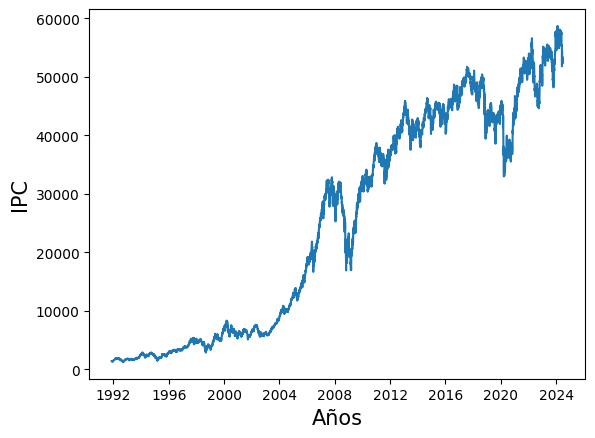

In [100]:
ipc = hist["Close"] # Se movió para acá para no repetir código.  Así se usa directamente ipc
#plt.figure(figsize=(18,13))
plt.title("")
plt.plot(ipc)
plt.xlabel("Años", fontsize=15)
plt.ylabel("IPC", fontsize=15)
plt.show()

# Limpiar la BD, quedarse sólo con la columna que se va a trabajar "Close"

In [101]:
ipc.tail(10)

Date
2024-06-07 00:00:00-06:00    52977.320312
2024-06-10 00:00:00-06:00    53122.578125
2024-06-11 00:00:00-06:00    53134.058594
2024-06-12 00:00:00-06:00    52975.890625
2024-06-13 00:00:00-06:00    52275.648438
2024-06-14 00:00:00-06:00    52222.941406
2024-06-17 00:00:00-06:00    52397.199219
2024-06-18 00:00:00-06:00    53191.250000
2024-06-19 00:00:00-06:00    53323.371094
2024-06-20 00:00:00-06:00    53333.031250
Name: Close, dtype: float64

# Obtener los máximos acumulados

In [102]:
max_acum = ipc.cummax ()
max_acum

Date
1991-11-18 00:00:00-06:00     1415.900024
1991-11-19 00:00:00-06:00     1415.900024
1991-11-21 00:00:00-06:00     1415.900024
1991-11-22 00:00:00-06:00     1415.900024
1991-11-26 00:00:00-06:00     1415.900024
                                 ...     
2024-06-14 00:00:00-06:00    58711.871094
2024-06-17 00:00:00-06:00    58711.871094
2024-06-18 00:00:00-06:00    58711.871094
2024-06-19 00:00:00-06:00    58711.871094
2024-06-20 00:00:00-06:00    58711.871094
Name: Close, Length: 8161, dtype: float64

# Graficar los máximos acumulados

<Axes: xlabel='Date'>

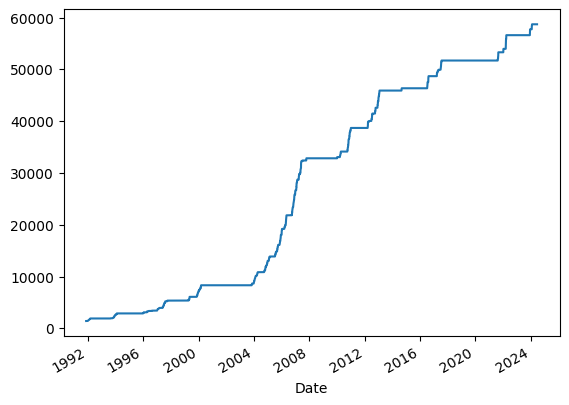

In [103]:
max_acum.plot()

In [104]:
drawdown_1 = (ipc-max_acum)/max_acum
drawdown_1

Date
1991-11-18 00:00:00-06:00    0.000000
1991-11-19 00:00:00-06:00   -0.035878
1991-11-21 00:00:00-06:00   -0.019775
1991-11-22 00:00:00-06:00   -0.028039
1991-11-26 00:00:00-06:00   -0.035808
                               ...   
2024-06-14 00:00:00-06:00   -0.110522
2024-06-17 00:00:00-06:00   -0.107554
2024-06-18 00:00:00-06:00   -0.094029
2024-06-19 00:00:00-06:00   -0.091779
2024-06-20 00:00:00-06:00   -0.091614
Name: Close, Length: 8161, dtype: float64

<Axes: xlabel='Date'>

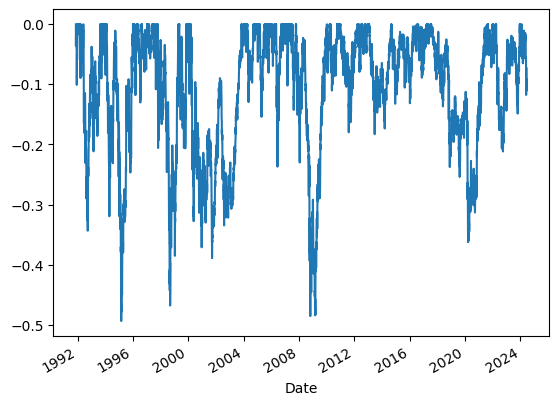

In [105]:
drawdown_1.plot()

In [106]:
drawdown_1.min()

-0.4938408686625221

# Retornos

Calcular los retornos

In [107]:
#El retorno en el tiempo t, es el rendimiento expresado en relación al tiempo anterior.
#Para cumplir el supuesto e ~N(0,1), se cumple el de la media=0, sin embargo la varianza no es constante, por eso la vamos a condicionar con un modelo ARCH -GARCH.
#Retorno en matriz
# print(hist['Close'].shape)
ipc = hist['Close']
retorno_diario = ipc.pct_change().dropna().values.reshape(-1,1)

#retorno Gráfica
retorno_diarioG = ipc.pct_change().dropna()

In [108]:
#
print(retorno_diarioG)

Date
1991-11-19 00:00:00-06:00   -0.035878
1991-11-21 00:00:00-06:00    0.016702
1991-11-22 00:00:00-06:00   -0.008430
1991-11-26 00:00:00-06:00   -0.007993
1991-11-27 00:00:00-06:00    0.004688
                               ...   
2024-06-14 00:00:00-06:00   -0.001008
2024-06-17 00:00:00-06:00    0.003337
2024-06-18 00:00:00-06:00    0.015154
2024-06-19 00:00:00-06:00    0.002484
2024-06-20 00:00:00-06:00    0.000181
Name: Close, Length: 8160, dtype: float64


# Graficar los Retornos

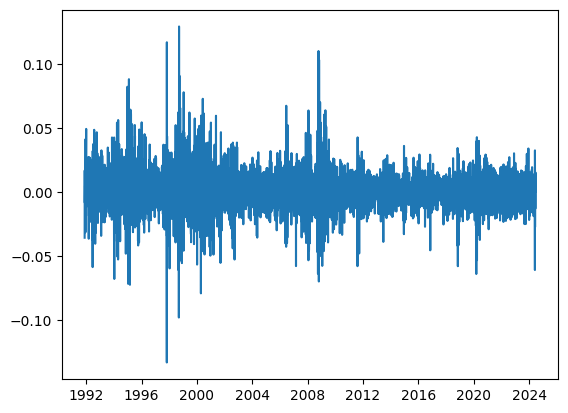

In [109]:
plt.plot(retorno_diarioG)

In [110]:
#Estadísticas Descriptivas de los retornos
print(retorno_diarioG.describe())

count    8160.000000
mean        0.000544
std         0.014059
min        -0.133371
25%        -0.006374
50%         0.000466
75%         0.007445
max         0.129230
Name: Close, dtype: float64


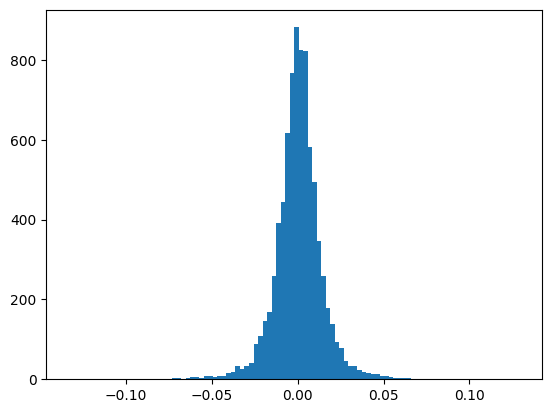

In [111]:
#Gráfica del comportamiento de los retornos
plt.hist(retorno_diarioG, bins=100)
plt.show()

# Red

# Cargar Librerías para la red

In [112]:
#Librerías para el procesamiento de Datos
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import sklearn
import yfinance as yf
#Librerías para entrenar la red
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,LSTM

# Divir el dataset en entrenamiento y prueba

In [113]:
#Cargar los datos
company = '^MXX'
ticker = yf.Ticker(company)
hist_train = ticker.history(start = '2000-1-1', end='2018-12-31')
#Datos matriz en una dimensión de los retornos para el entrenamiento
retorno_train = hist_train['Close'].pct_change().dropna()

In [114]:
#Datos matriz en una dimensión de los retornos para la prueba
hist_test = ticker.history(start = '2019-1-1', end='2019-12-31')
retorno_test = hist_test["Close"].pct_change().dropna()

In [115]:

# Escalar los datos
scaler = MinMaxScaler()
retorno_train_scaled = scaler.fit_transform(retorno_train.values.reshape(-1,1))
retorno_test_scaled = scaler.transform(retorno_test.values.reshape(-1,1))


In [116]:
# Crear secuencias de datos para la entrada del modelo
def crear_secuencia(data, seq_length):
    xs = []
    ys = []
    for i in range(len(data) - seq_length):
        x = data[i:i + seq_length]
        y = data[i + seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)


In [117]:
prediction_days = 60

x_train, y_train = crear_secuencia(retorno_train_scaled, prediction_days)
x_test, y_test = crear_secuencia(retorno_test_scaled, prediction_days)

# Reshape para la entrada del modelo
#x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

x_train.shape

(4703, 60, 1)

In [118]:
print(x_train[0,:,:])
print(y_train[0])
print(retorno_train_scaled[0:61])

[[0.1187328 ]
 [0.48937045]
 [0.40906233]
 [0.64997922]
 [0.63367808]
 [0.28174514]
 [0.4418356 ]
 [0.49284864]
 [0.49658261]
 [0.46588768]
 [0.31699341]
 [0.32343038]
 [0.31998426]
 [0.30939029]
 [0.39179735]
 [0.44245735]
 [0.44429321]
 [0.3696864 ]
 [0.26033515]
 [0.3690642 ]
 [0.54308938]
 [0.44188683]
 [0.63208462]
 [0.56395511]
 [0.67870517]
 [0.4126438 ]
 [0.33933125]
 [0.59898674]
 [0.35032053]
 [0.37376042]
 [0.43040744]
 [0.43712291]
 [0.37550765]
 [0.28403125]
 [0.39694985]
 [0.36104962]
 [0.58486814]
 [0.38264663]
 [0.34309007]
 [0.44229141]
 [0.44190084]
 [0.59541224]
 [0.69138564]
 [0.50037902]
 [0.31089692]
 [0.44617558]
 [0.60970053]
 [0.43451884]
 [0.32866963]
 [0.30679352]
 [0.30805992]
 [0.52151333]
 [0.41535485]
 [0.42087542]
 [0.36674345]
 [0.33628476]
 [0.5281005 ]
 [0.51869138]
 [0.44889977]
 [0.29744912]]
[0.37447963]
[[0.1187328 ]
 [0.48937045]
 [0.40906233]
 [0.64997922]
 [0.63367808]
 [0.28174514]
 [0.4418356 ]
 [0.49284864]
 [0.49658261]
 [0.46588768]
 [0.31

In [119]:
# Construir el modelo LSTM
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(prediction_days, 1), return_sequences=True))
model.add(LSTM(50, activation='relu', return_sequences=True))
model.add(LSTM(30, activation='relu', return_sequences=True))
model.add(LSTM(20, activation='relu'))
model.add(Dense(1))


model.compile(optimizer='adam', loss='mean_squared_error')




history = model.fit(x_train,y_train,epochs=50,batch_size=32)

Epoch 1/50


c:\Users\Sergio Nava\anaconda3\envs\py311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


147/147 ━━━━━━━━━━━━━━━━━━━━ 13s 54ms/step - loss: 0.0546
Epoch 2/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - loss: 0.0045
Epoch 3/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - loss: 0.0046
Epoch 4/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 7s 48ms/step - loss: 0.0047
Epoch 5/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - loss: 0.0046
Epoch 6/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - loss: 0.0048
Epoch 7/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - loss: 0.0047
Epoch 8/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - loss: 0.0044
Epoch 9/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - loss: 0.0044
Epoch 10/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - loss: 0.0044
Epoch 11/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - loss: 0.0045
Epoch 12/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - loss: 0.0043
Epoch 13/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 7s 48ms/step - loss: 0.0044
Epoch 14/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 7s 48ms/step - loss: 0.0043
Epoch 15/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step

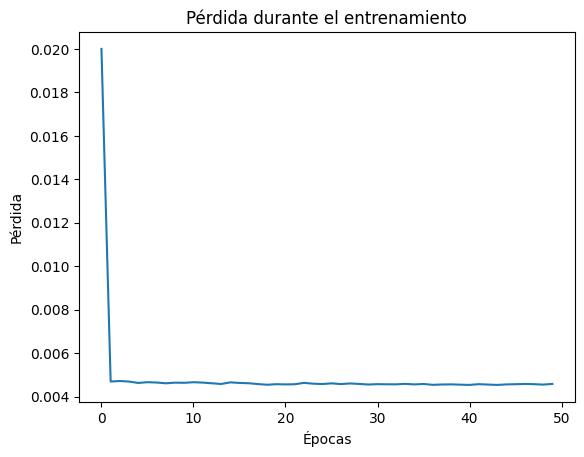

In [120]:
# Extrae la pérdida (loss) y la precisión (accuracy) de cada época
loss = history.history['loss']

# Importa la biblioteca matplotlib para crear la gráfica
import matplotlib.pyplot as plt

# Crea la gráfica de pérdida
plt.plot(loss)
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.show()

In [121]:

#total_dataset = np.concatenate((retorno_train, retorno_test))
#print (total_dataset)

#model_inputs = total_dataset[len(total_dataset)-len(hist_test)-prediction_days:].values
#model_inputs = scaler.transform(model_inputs.reshape(-1,1))




In [122]:
#x_test = []

#for x in range(prediction_days,len(model_inputs)):
#  x_test.append(model_inputs[x-prediction_days:x,0])

#x_test = np.array(x_test)
#x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))



# Hacer predicciones
predictions = model.predict(x_test)

# Desescalar las predicciones
predictions_rescaled = scaler.inverse_transform(predictions)
y_test_rescaled = scaler.inverse_transform(y_test)

#predicted_prices = model.predict(x_test)
#predicted_prices = scaler.inverse_transform(predicted_prices)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step


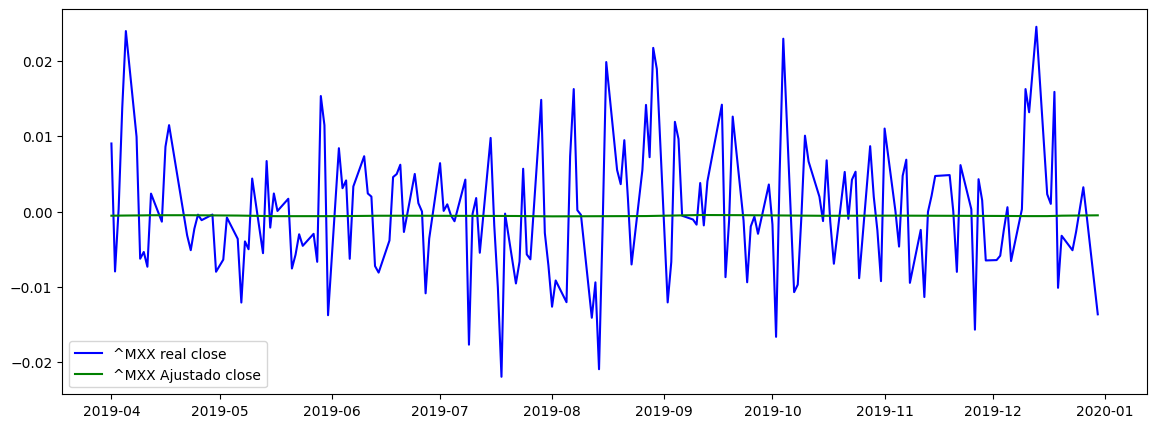

In [123]:
plt.figure(figsize=(14, 5))
plt.plot(retorno_test.index[prediction_days:],y_test_rescaled,color="blue",label=f"{company} real close")
plt.plot(retorno_test.index[prediction_days:],predictions_rescaled,color="green",label=f"{company} Ajustado close")
plt.legend()
plt.show()

In [124]:

# Calcular el MSE
mse = mean_squared_error(y_test_rescaled, predictions_rescaled)
print(f'Error Cuadrático Medio (MSE): {mse}')


Error Cuadrático Medio (MSE): 6.998532397908053e-05
